# NAML project - Stroke prediction
###  Cavallini - Eusebio

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [71]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

cathegorical_features = ['work-type', 'smoking-status']
binary_features = ['hypertension', 'heart-disease', 'gender', 'ever-married', 'Residence-type']
numerical_features = ['age', 'avg-glucose-level', 'bmi']

df.columns = new_cols

In [72]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [73]:
df.drop('id', axis=1, inplace=True) # drop id column because it is not useful

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


## Data Pre-processing

In [75]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [76]:
df.dropna(inplace=True)

In [77]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

As we can clearly see the BMI column presents some N/A values that we have removed. 

In [78]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In the paper is clearly stated that only the patients above 18 years old were considered. We have removed the patients below 18 years old.

In [79]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [80]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [81]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


We filter out also the patients whose gender and smoking status are unknown. This to reduce the uncertainty in the data.

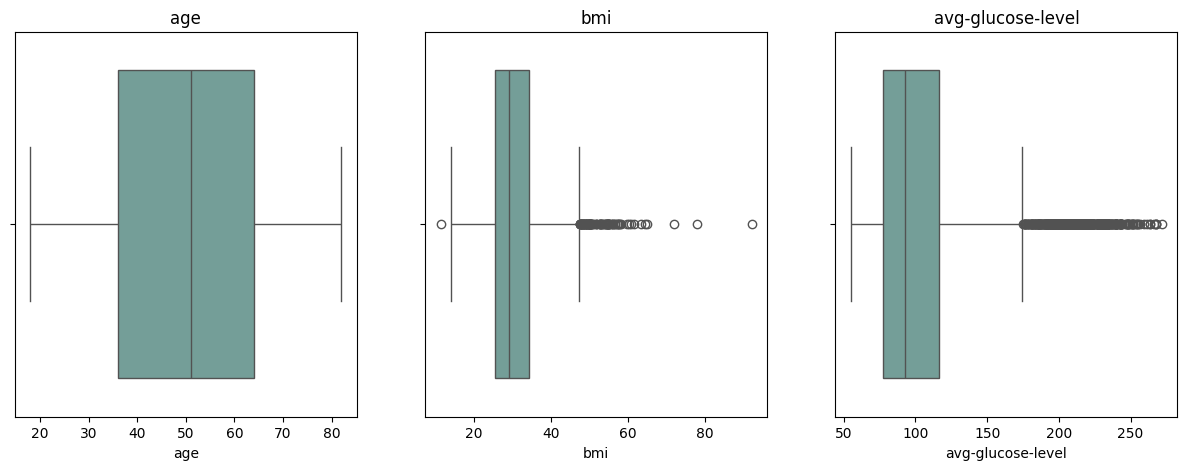

In [82]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [83]:
print(df[df['bmi'] < 12])

     gender   age  hypertension  heart-disease ever-married work-type  \
2187   Male  40.0             0              0          Yes   Private   

     Residence-type  avg-glucose-level   bmi smoking-status  stroke  
2187          Rural              60.96  11.5   never smoked       0  


In the paper, the autors have removed the single lowest bmi value. We have done the same.

In [84]:
df = df[df['bmi'] > 12]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


## Exploratory Data Analysis

In [85]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [86]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [87]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.54%


In [88]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [89]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


C:\Users\hp\AppData\Local\Temp\ipykernel_19552\140164340.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))


In [90]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


C:\Users\hp\AppData\Local\Temp\ipykernel_19552\2819490883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19552\2819490883.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19552\2819490883.py:4: FutureWarning: Series.__getitem__ 

In [91]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


C:\Users\hp\AppData\Local\Temp\ipykernel_19552\159459921.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19552\159459921.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))


In [92]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


C:\Users\hp\AppData\Local\Temp\ipykernel_19552\4037653718.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19552\4037653718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
C:\Users\hp\AppData\Local\Temp\ipykernel_19552\4037653718.py:4: FutureWarning: Series.__getite

The percentages showed above are exactly the same as the ones in the paper.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [94]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


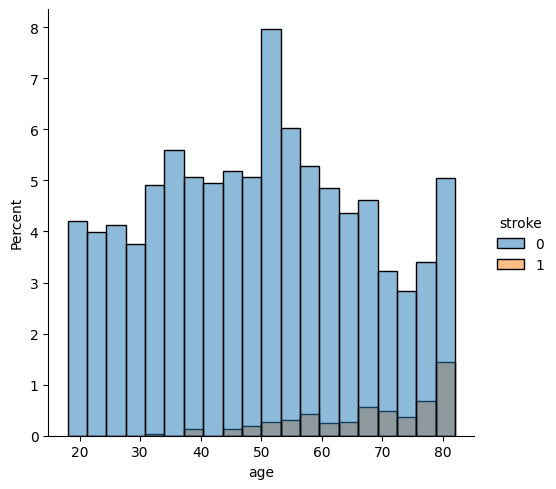

In [95]:
sns.displot(data = df, x='age', hue='stroke',  bins=20, kde=False, color='blue', stat='percent')

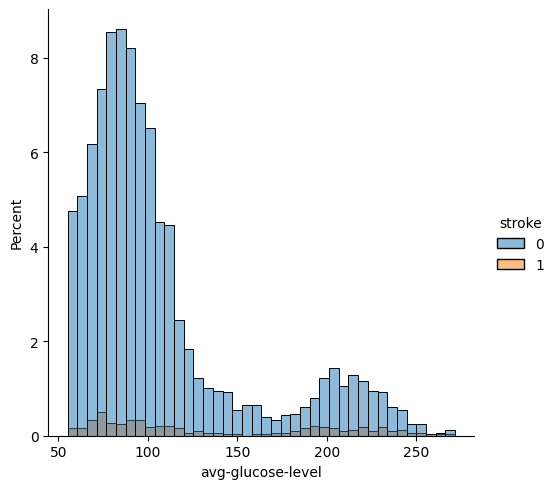

In [96]:
sns.displot(data = df, x='avg-glucose-level', hue='stroke', bins=40, kde=False, color='blue', stat='percent')

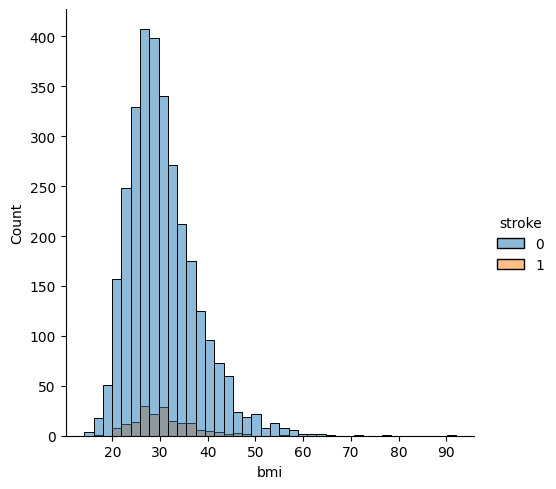

In [97]:
sns.displot(data=df, x='bmi', hue='stroke', bins=40, kde=False, color='blue')

### Oversampling

In [98]:
features = np.array(df.columns[:-1])
print(features)

X = df.drop(['stroke'], axis = 1) # Data
y = df['stroke'] # Target

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [99]:
y.value_counts()

stroke
0    3074
1     180
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

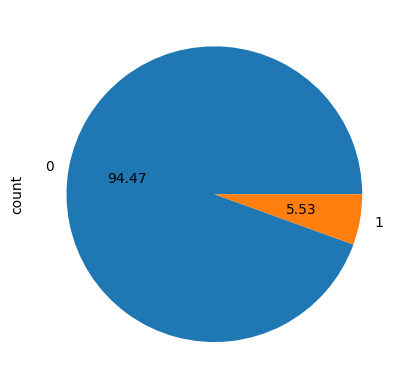

In [100]:
y.value_counts().plot.pie(autopct = "%.2f")

We can clearly see that there is a disproportion between the number of smokers and non-smokers. This is a problem because the model could be biased towards the non-smokers. We will try to balance the dataset by oversampling the smokers.

In [101]:
X.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


Applying the oversampling SMOTE technique. To use this technique it is necessary to use only numerical features.
We have also augmented the whole dataset instead of just the training part, as it was done in the paper.

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

X_tmp = X.copy()
y_tmp = y.copy()

# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[cathegorical_features], prefix_sep='__')
dummies_columns = dummies.columns

X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)
tmp_features = X_tmp.columns

X_tmp[dummies_columns] = np.round(X_tmp[dummies_columns]).astype(int)

# Apply ordinal encoding to binary features
oe = OrdinalEncoder()
X_tmp[binary_features] = oe.fit_transform(X_tmp[binary_features])

# Normalize the data
scaler = RobustScaler()
X_tmp = scaler.fit_transform(X_tmp, y_tmp)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tmp, y_tmp)

# Inverse the normalization
X_smote = scaler.inverse_transform(X_smote)

# Reconstructing the dataframe
X_smote = pd.DataFrame(X_smote, columns=tmp_features)

# Averaging out the data that came from the SMOTE
X_smote[dummies_columns] = np.round(X_smote[dummies_columns]).astype(bool)
X_smote[binary_features] = np.round(X_smote[binary_features]).astype(int)

# inverse the ordinal encoding
X_smote[binary_features] = oe.inverse_transform(X_smote[binary_features])

# inverse the one hot encoding
dummies = pd.from_dummies(X_smote[dummies_columns], sep='__')
X_smote.drop(columns=dummies_columns, inplace=True)
X_smote = pd.concat([X_smote, dummies], axis=1)

X_smote.describe()

,age,avg-glucose-level,bmi
count,6148.000000,6148.000000,6148.000000
mean,58.855787,122.714854,30.513929
std,17.123046,57.048802,6.523830
min,18.000000,55.120000,14.100000
25%,47.220578,79.919937,26.262771
50%,61.198607,98.995276,29.500000
75%,73.779847,172.338583,33.932903
max,82.000000,271.740000,92.000000


From the amount of values used, we can clearly see that the they match exactly the ones in the paper.

In [103]:
X_smote.head()

,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,Private,formerly smoked
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,Private,never smoked
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,Private,smokes
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,Self-employed,never smoked
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,Private,formerly smoked


In [104]:
# the balanced dataset is saved in new variables that will be used for plotting
X_balanced = X_smote.copy()
y_balanced = y_smote.copy()

# the dataset values are redefined to the balanced ones
X = X_smote.copy()
y = y_smote.copy()

# after oversampling the hypertension and heart-disease cathegory have become of type 'object'
X['hypertension'] = X['hypertension'].astype(int)
X['heart-disease'] = X['heart-disease'].astype(int)

In [105]:
df_balanced = X_balanced
df_balanced['stroke'] = y_balanced
df_balanced.head()

,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status,stroke
0,Male,67.0,0,1,Yes,Urban,228.69,36.6,Private,formerly smoked,1
1,Male,80.0,0,1,Yes,Rural,105.92,32.5,Private,never smoked,1
2,Female,49.0,0,0,Yes,Urban,171.23,34.4,Private,smokes,1
3,Female,79.0,1,0,Yes,Rural,174.12,24.0,Self-employed,never smoked,1
4,Male,81.0,0,0,Yes,Urban,186.21,29.0,Private,formerly smoked,1


In [106]:
df_balanced.describe()

,age,avg-glucose-level,bmi,stroke
count,6148.000000,6148.000000,6148.000000,6148.000000
mean,58.855787,122.714854,30.513929,0.500000
std,17.123046,57.048802,6.523830,0.500041
min,18.000000,55.120000,14.100000,0.000000
25%,47.220578,79.919937,26.262771,0.000000
50%,61.198607,98.995276,29.500000,0.500000
75%,73.779847,172.338583,33.932903,1.000000
max,82.000000,271.740000,92.000000,1.000000


### Graphs

<AxesSubplot:xlabel='stroke', ylabel='count'>

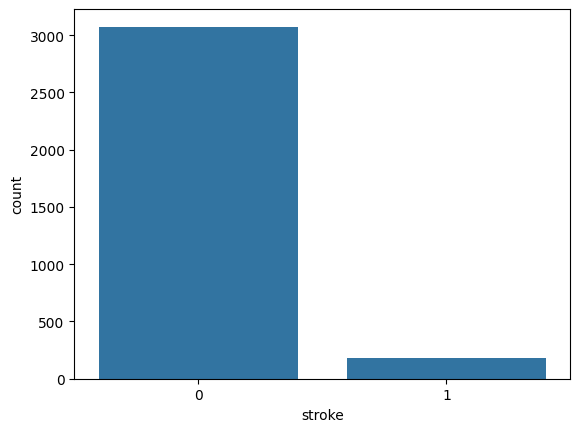

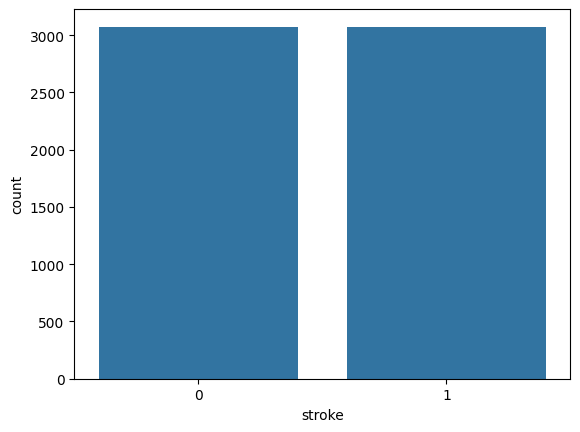

In [107]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

We can clearly see that the dataset is now balanced. The stroke and non-stroke patients are now equally represented in the train dataset.

<AxesSubplot:xlabel='age_bucket', ylabel='percent'>

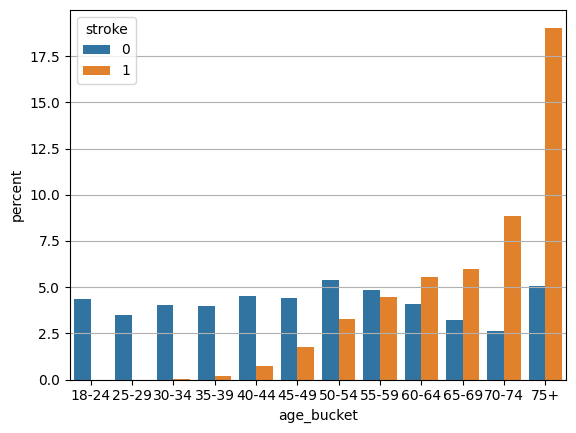

In [108]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

In [109]:
mask = np.logical_and(df['stroke'] == 1, df['age'] >= 74)
stroke_eldery = df[mask]['age'].value_counts().sum()
print("Probability of stroke after 74y/o is {:.2f}%".format(100 *stroke_eldery/stroke_count[1]))

Probability of stroke after 74y/o is 42.78%


As also observed in the paper, the number of elderly patients who had a stroke is higher than the number of young patients who had a stroke.

<AxesSubplot:xlabel='hypertension', ylabel='percent'>

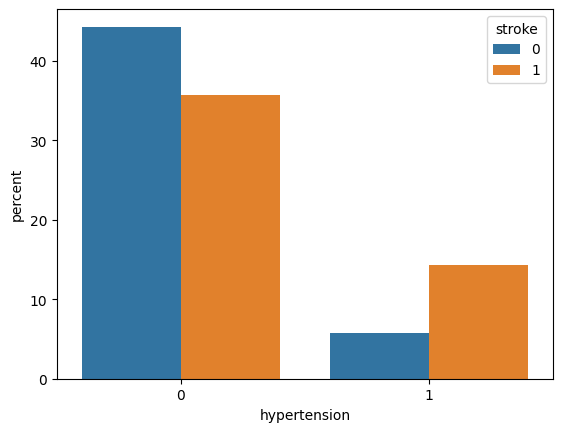

In [110]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='heart-disease', ylabel='percent'>

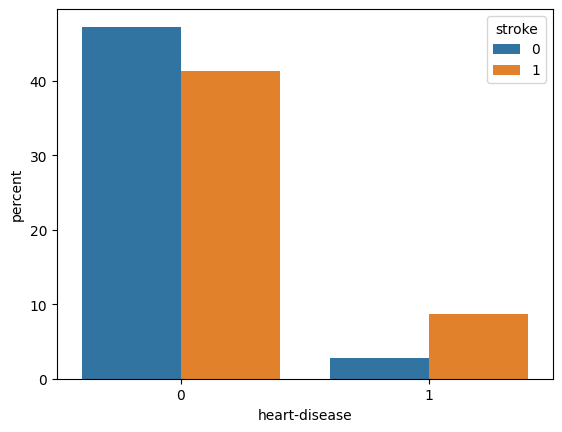

In [111]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

The fact that both the heart disesase class and the hypertension seem not to contribute significantly to the model is also observed in the paper. The authors explain it as a possible consequence of the lack of screening. When these simptoms are not found, they can not be acted on.

<AxesSubplot:xlabel='smoking-status', ylabel='percent'>

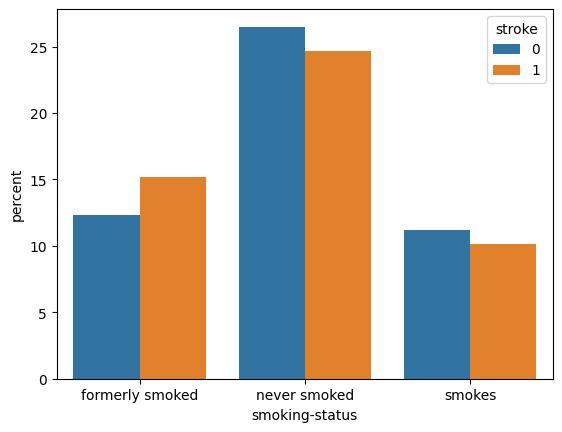

In [112]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<AxesSubplot:xlabel='bmi_bucket', ylabel='percent'>

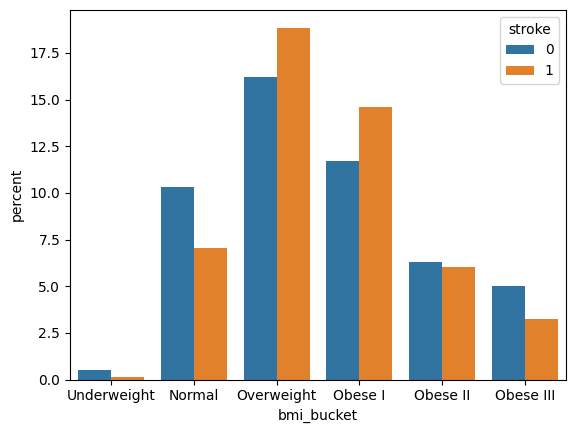

In [113]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

The BMI plot suggests that most of the patients that had suffered from a stroke are either overweight or obese.

<AxesSubplot:xlabel='Residence-type', ylabel='percent'>

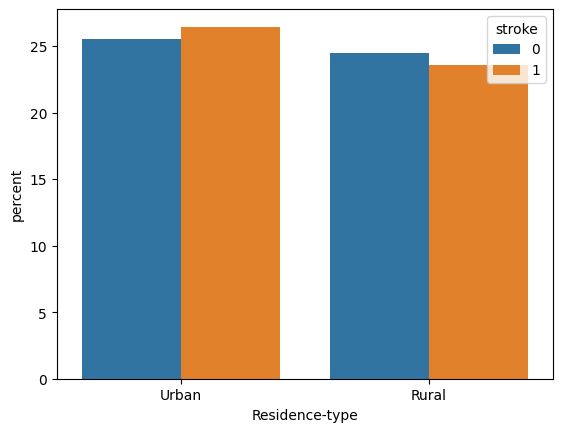

In [114]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

The urban residence seems to be more common among the patients that had a stroke. Although the difference is not very significant.

<AxesSubplot:xlabel='work-type', ylabel='percent'>

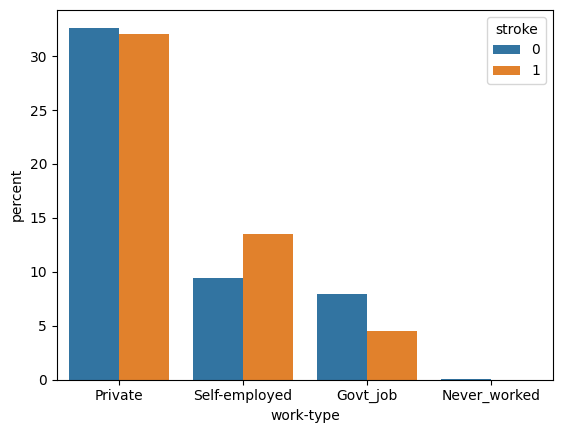

In [115]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

The private sector seems to have a higher percentage of stroke patients. This is also observed in the paper. However, we should also point out that the private sector also has a higher representation in the dataset.

<AxesSubplot:xlabel='gender', ylabel='percent'>

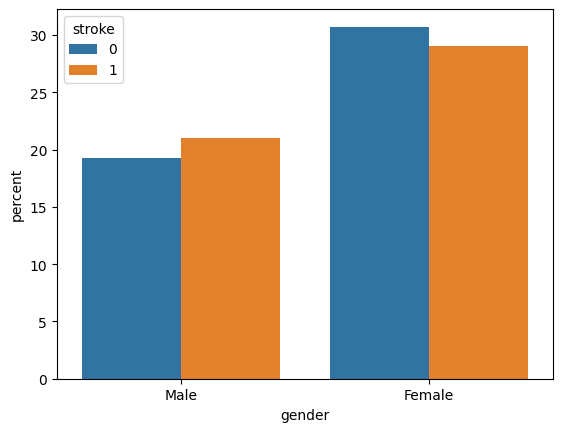

In [116]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')

The graphs visualized so far are similar to the ones in the paper. This indicatest that the data pre-processing was done correctly.

## Feature Ranking

Before applying the feature ranking, we split the dataset into train and test.

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # the data is split into 80% training and 20% testing randomly

In [118]:
X_train.head()

,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status
1401,Male,25.000000,0,0,Yes,Rural,93.880000,24.300000,Private,smokes
5944,Female,71.163920,0,0,Yes,Urban,117.865509,28.288523,Govt_job,never smoked
3771,Male,80.798083,0,0,Yes,Urban,71.945793,25.875973,Private,never smoked
5694,Male,79.964216,0,1,Yes,Rural,106.684704,32.328237,Private,never smoked
3372,Male,80.479033,0,0,Yes,Rural,98.093768,27.284359,Self-employed,never smoked


### Apply the random forest classifier to select the most important features

We start with the preprocessing part, in which we on-hot encode the cathegorical feature, label encode the binary ones and scale the numerical ones.

In [119]:
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, MinMaxScaler

X_tmp = X.copy()
y_tmp = y.copy()

# Apply one hot encoding to cathegorical features
dummies = pd.get_dummies(X_tmp[cathegorical_features]) 
X_tmp = X_tmp.drop(cathegorical_features, axis=1)
X_tmp = pd.concat([X_tmp, dummies], axis=1)

tmp_features = X_tmp.columns

# Apply ordinal encoding to binary features
oe = OrdinalEncoder()
X_tmp[binary_features] = oe.fit_transform(X_tmp[binary_features])

# Normalize the data
scaler = MinMaxScaler()
X_tmp[numerical_features] = scaler.fit_transform(X_tmp[numerical_features])

We procede training the random forest classifier

{'heart-disease': 0.022789753531587725, 'ever-married': 0.02595305465482526, 'gender': 0.028163114096142316, 'Residence-type': 0.030395506037247708, 'hypertension': 0.0327462542412206, 'work-type': 0.04169965225736763, 'smoking-status': 0.04603728751633314, 'bmi': 0.17074586977829043, 'avg-glucose-level': 0.22196411820715484, 'age': 0.3795053896798305}


<BarContainer object of 10 artists>

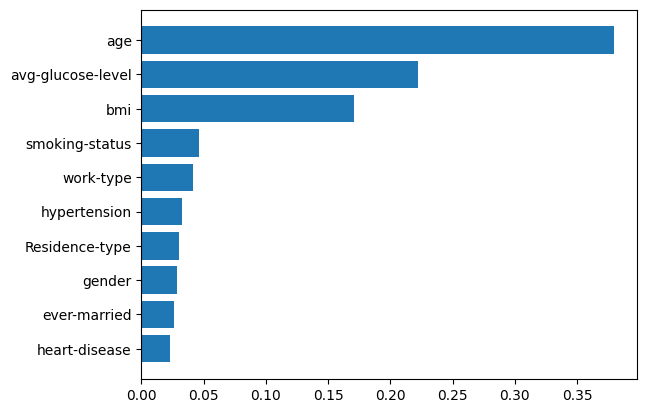

In [120]:
from sklearn.ensemble import RandomForestClassifier

dataset_features = df.columns[:-1]

rf_classifier = RandomForestClassifier(random_state=42)

importances = dict()
for f in dataset_features:
    importances[f] = 0

rf_classifier.fit(X_tmp, y_tmp)

feature_importance = list(zip(tmp_features, rf_classifier.feature_importances_))

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp
    

importances = dict(sorted(importances.items(), key=lambda item: item[1]))
print(importances)    
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])

We continue with the information gain ranking

{'Residence-type': 0.004820219944445148, 'work-type': 0.008257244714612089, 'gender': 0.009569864547610107, 'heart-disease': 0.012857952478592782, 'smoking-status': 0.016877113930927612, 'ever-married': 0.022581960813645496, 'hypertension': 0.025698392314776664, 'avg-glucose-level': 0.05032746136145372, 'bmi': 0.4134674235191307, 'age': 0.5252440278497581}


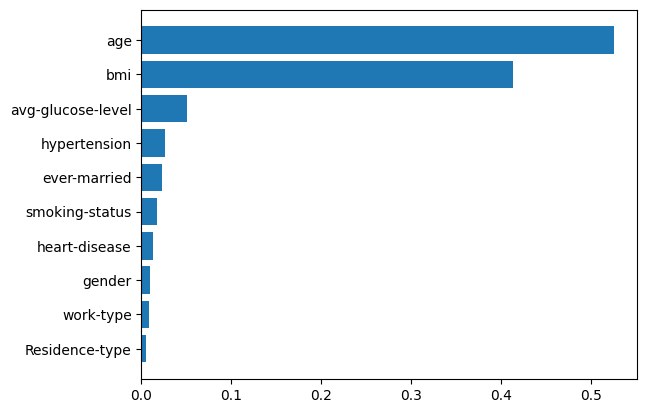

In [121]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_tmp, y_tmp, random_state=42)

feature_importance = list(zip(tmp_features, mi))
importances = dict()
for f in dataset_features:
    importances[f] = 0

for f in dataset_features:
    for f2, imp in feature_importance:
        if f in f2:
            importances[f] += imp


importances = dict(sorted(importances.items(), key=lambda item: item[1]))            
plt.barh([k for k, _ in importances.items()],[v for _, v in importances.items()])
print(importances)

Both models predict Age to be the the most influent feature in the prediction of stroke. This is consistent with the paper. Both feature ranking algorithms seem to agree on the importance of BMI and glucose level.

## Model training

In this section we will train each model, as specified by the paper and we will compute the specified metrics.

In [122]:
# metrics list
confusion_matrices = dict()
cross_val_scores_mean = dict()
accuracy = dict()
precision = dict()
recall = dict()

F_metric = dict()
auc_score = dict()

In [123]:
print(X_train.shape)
X_train.head()

(4918, 10)


,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status
1401,Male,25.000000,0,0,Yes,Rural,93.880000,24.300000,Private,smokes
5944,Female,71.163920,0,0,Yes,Urban,117.865509,28.288523,Govt_job,never smoked
3771,Male,80.798083,0,0,Yes,Urban,71.945793,25.875973,Private,never smoked
5694,Male,79.964216,0,1,Yes,Rural,106.684704,32.328237,Private,never smoked
3372,Male,80.479033,0,0,Yes,Rural,98.093768,27.284359,Self-employed,never smoked


In [124]:
print(X_test.shape)
X_test.head()

(1230, 10)


,gender,age,hypertension,heart-disease,ever-married,Residence-type,avg-glucose-level,bmi,work-type,smoking-status
4616,Female,72.233799,1,0,Yes,Urban,221.532821,29.939880,Private,never smoked
2523,Female,39.000000,0,0,Yes,Urban,87.790000,40.000000,Self-employed,formerly smoked
4701,Female,43.687433,0,0,Yes,Urban,72.772962,27.987476,Private,never smoked
3343,Male,64.264658,0,1,Yes,Rural,203.569504,35.336515,Private,formerly smoked
3258,Female,76.114114,0,0,Yes,Urban,108.815451,24.945152,Private,formerly smoked


To tune the hyperparameters we will use the GridSearchCV method. In this way we are going to find the best hyperparameters for each model, and subsequently we will implement the models with the best hyperparameters and train the stacking and voting methods.

### DO NOT EXECUTE UNLESS YOU HAVE TIME ####

In [131]:
execute_model_grid_search = True

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier

processor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('bool', OrdinalEncoder(), binary_features),
        ('cat', OneHotEncoder(categories=[['Private', 'Self-employed', 'Govt_job', 'Never_worked'], ['smokes', 'never smoked', 'formerly smoked']]), cathegorical_features)])

scaler = ColumnTransformer(
    transformers=[
        ('num_scale', StandardScaler(), [1, 7, 8])
    ],
    remainder='passthrough')

grid_models = [
               ('Naive Bayes', GaussianNB(),[{'var_smoothing': [1e-08, 1e-07, 1e-06]}]),
               ('Logistic Regression', LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0], 'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'max_iter':[1000]}]),
               ('SGD', SGDClassifier(), [{'loss': ['hinge', 'log_loss', 'modified_huber'],'penalty': ['l2', 'l1', 'elasticnet'],'alpha': [0.0001, 0.001, 0.01, 0.1]}]),
               ('KNN', KNeighborsClassifier(),[{'n_neighbors':[3,5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'], 'weights': ['uniform', 'distance']}]), 
               ('Decision Tree', DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               ('Random Forest', RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               ('MLP', MLPClassifier(),[{'hidden_layer_sizes':[(10,),(20,), (25,)],'max_iter':[500],'learning_rate':['constant'], 'learning_rate_init':[0.003, 0.03, 0.3], 'momentum':[0.02,0.2], 'activation': ['relu', 'tanh']}])
               ]

# dictionary to store the trained models, with the best hyperparameters
models = dict()

if execute_model_grid_search:
    for k, m, param_grid in grid_models:
        grid = GridSearchCV(estimator=m, param_grid = param_grid, scoring = 'f1', cv = 10, refit=True) # f1 score is used as scoring metric, because it is the harmonic mean of precision and recall

        pipeline = Pipeline([
            ('processor', processor),
            ('scaler', scaler),
            ('model', grid)
        ])

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        best_accuracy = grid.best_score_
        best_param = grid.best_params_

        cross_val_scores_mean[k] = best_accuracy

        confusion_matrices[k] = confusion_matrix(y_test, y_pred)
        accuracy[k] = accuracy_score(y_test, y_pred)
        precision[k] = precision_score(y_test, y_pred)
        recall[k] = recall_score(y_test, y_pred)
        F_metric[k] = f1_score(y_test, y_pred)
        auc_score[k] = roc_auc_score(y_test, y_pred)

        models[k] = pipeline  # save the model with the best hyperparameters

        print('{}:\nBest Accuracy : {:.2f}%'.format(k,best_accuracy*100))
        print('Best Parameters : ',best_param)
        print("10-fold cross validation score: ", cross_val_scores_mean[k])
        print("Accuracy: ", accuracy[k])
        print("Precision: ", precision[k])
        print("Recall: ", recall[k])
        print("F1 score: ", F_metric[k])
        print("AUC: ", auc_score[k])
        print('')
        print(classification_report(y_test, y_pred))
        print('----------------')
        print('')

Naive Bayes:
Best Accuracy : 75.56%
Best Parameters :  {'var_smoothing': 1e-07}
10-fold cross validation score:  0.7556407425171512
Accuracy:  0.7252032520325203
Precision:  0.6771084337349398
Recall:  0.8892405063291139
F1 score:  0.7688098495212038
AUC:  0.7205399856060285

              precision    recall  f1-score   support

           0       0.82      0.55      0.66       598
           1       0.68      0.89      0.77       632

    accuracy                           0.73      1230
   macro avg       0.75      0.72      0.72      1230
weighted avg       0.75      0.73      0.72      1230

----------------

Logistic Regression:
Best Accuracy : 76.83%
Best Parameters :  {'C': 0.25, 'max_iter': 1000, 'random_state': 0, 'solver': 'liblinear'}
10-fold cross validation score:  0.7682761183897009
Accuracy:  0.7634146341463415
Precision:  0.7518463810930576
Recall:  0.805379746835443
F1 score:  0.7776928953399541
AUC:  0.7622216459929723

              precision    recall  f1-score   s

Here are the results of the models, do not execute this portion if you have already executed the previous one

In [ ]:
models_optimal = {
    'Naive Bayes': GaussianNB(var_smoothing=1e-07),
    'Logistic Regression': LogisticRegression(C=0.25, random_state=0, solver='liblinear', max_iter=1000),
    'SGD': SGDClassifier(alpha=0.1, loss='hinge', penalty='l2'),
    'KNN': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0, criterion='entropy', n_estimators=200),
    'MLP': MLPClassifier(learning_rate='constant', learning_rate_init=0.003, momentum=0.2, activation='tanh', max_iter=500, hidden_layer_sizes=(25,))
}

In [137]:
# define the base models
base_models_stacking = [
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    ('nb', GaussianNB(var_smoothing=1e-07)),
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]
base_models_voting = [
    ('rf', RandomForestClassifier(criterion='gini', n_estimators=200, random_state=0)),
    ('dt1', DecisionTreeClassifier(criterion='gini', random_state=0)),
    ('dt2', DecisionTreeClassifier(criterion='entropy', random_state=0)),
]

# Define the meta-model for stacking
meta_model = LogisticRegression(C=0.75, random_state=0, solver='lbfgs', max_iter=500)

stacking = StackingClassifier(estimators=base_models_stacking, final_estimator=meta_model, cv=10)
voting = VotingClassifier(estimators=base_models_voting, voting='hard') # in the paper the voting is hard

pipeline_stack = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', stacking)
    ])

pipeline_vote = Pipeline([
        ('processor', processor),
        ('scaler', scaler),
        ('model', voting)
    ])


# Evaluating the stacking method
models['stacking'] = pipeline_stack.fit(X_train, y_train)

y_pred = pipeline_stack.predict(X_test)

cross_val_scores_mean['stacking'] = cross_val_score(pipeline_stack, X_train, y_train, cv=10).mean()

confusion_matrices['stacking'] = confusion_matrix(y_test, y_pred)
accuracy['stacking'] = accuracy_score(y_test, y_pred)
precision['stacking'] = precision_score(y_test, y_pred)
recall['stacking'] = recall_score(y_test, y_pred)
F_metric['stacking'] = f1_score(y_test, y_pred)
auc_score['stacking'] = roc_auc_score(y_test, y_pred)

print("Model: Stacking")
print("10-fold cross validation score: ", cross_val_scores_mean['stacking'])
print("Accuracy: ", accuracy['stacking'])
print("Precision: ", precision['stacking'])
print("Recall: ", recall['stacking'])
print("F1 score: ", F_metric['stacking'])
print("AUC: ", auc_score['stacking'])


# Evaluating the Majority voting
models['voting'] = pipeline_vote.fit(X_train, y_train)

y_pred = pipeline_vote.predict(X_test)

cross_val_scores_mean['voting'] = cross_val_score(pipeline_vote, X_train, y_train, cv=10).mean()

confusion_matrices['voting'] = confusion_matrix(y_test, y_pred)
accuracy['voting'] = accuracy_score(y_test, y_pred)
precision['voting'] = precision_score(y_test, y_pred)
recall['voting'] = recall_score(y_test, y_pred)
F_metric['voting'] = f1_score(y_test, y_pred)
auc_score['voting'] = roc_auc_score(y_test, y_pred)

print("Model: Majority Voting")
print("10-fold cross validation score: ", cross_val_scores_mean['voting'])
print("Accuracy: ", accuracy['voting'])
print("Precision: ", precision['voting'])
print("Recall: ", recall['voting'])
print("F1 score: ", F_metric['voting'])
print("AUC: ", auc_score['voting'])

Model: Stacking
10-fold cross validation score:  0.9542446972331229
Accuracy:  0.9479674796747968
Precision:  0.9465408805031447
Recall:  0.9525316455696202
F1 score:  0.9495268138801262
AUC:  0.9478377291393252
Model: Majority Voting
10-fold cross validation score:  0.9326896329044756
Accuracy:  0.9260162601626016
Precision:  0.9129770992366413
Recall:  0.9462025316455697
F1 score:  0.9292929292929293
AUC:  0.9254424029465307


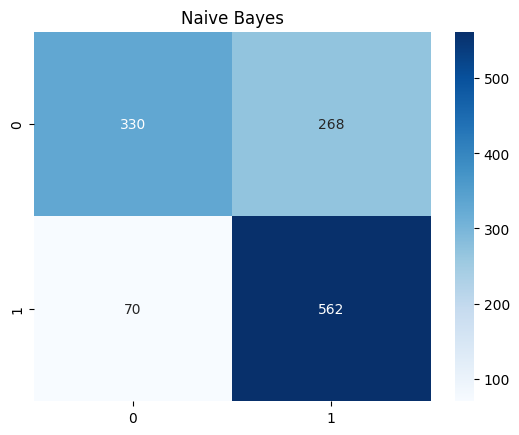

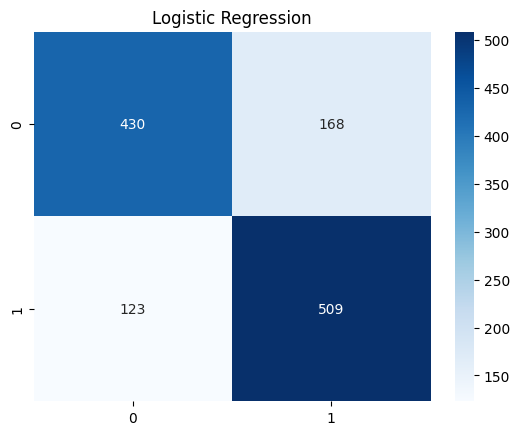

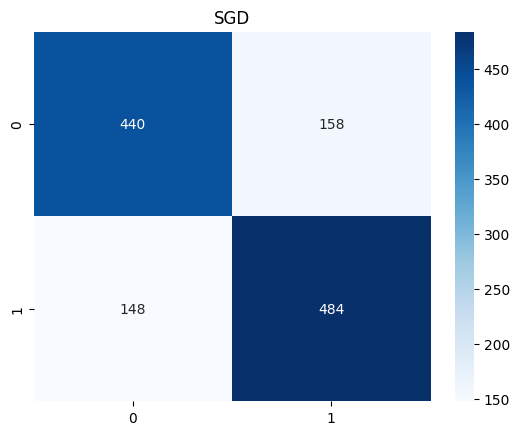

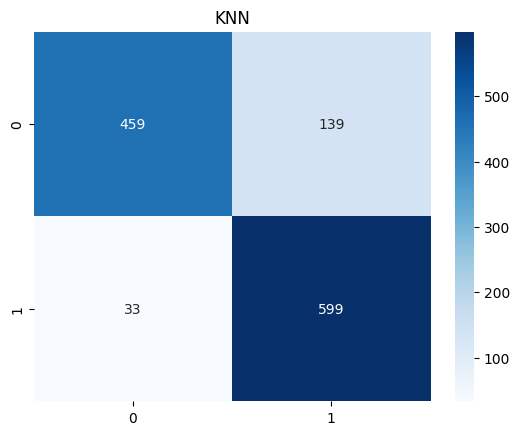

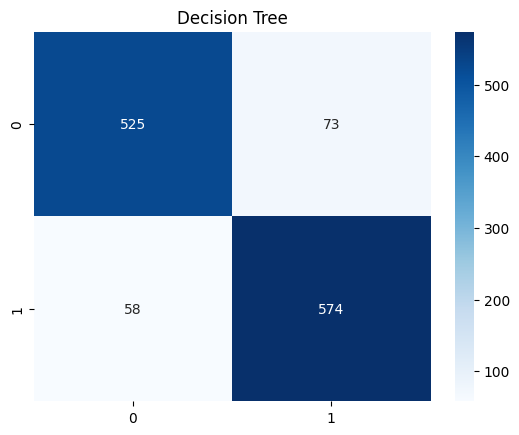

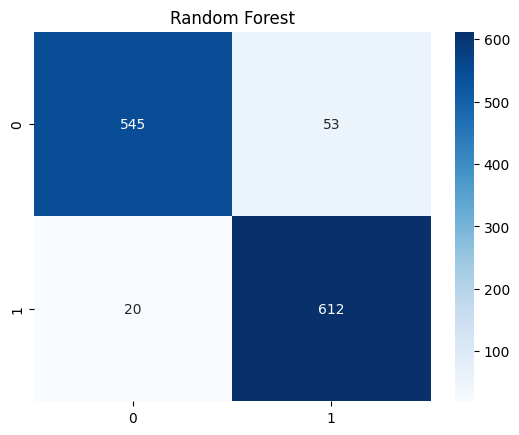

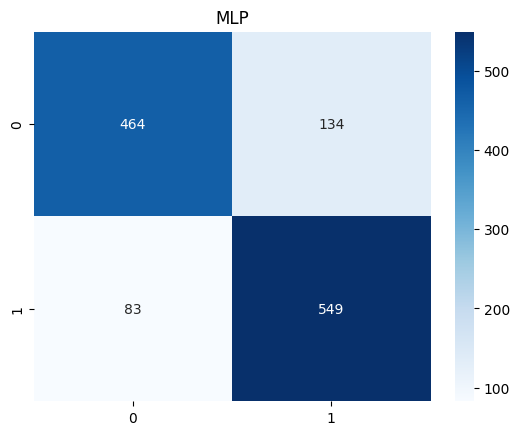

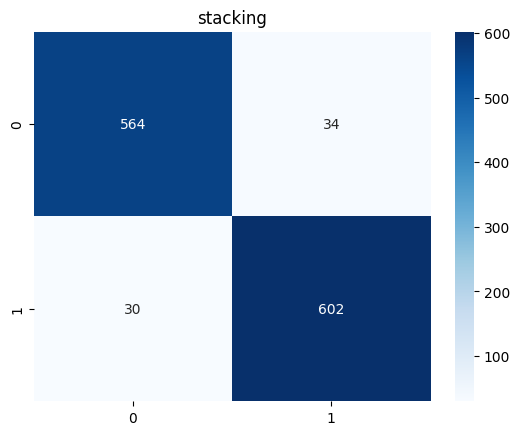

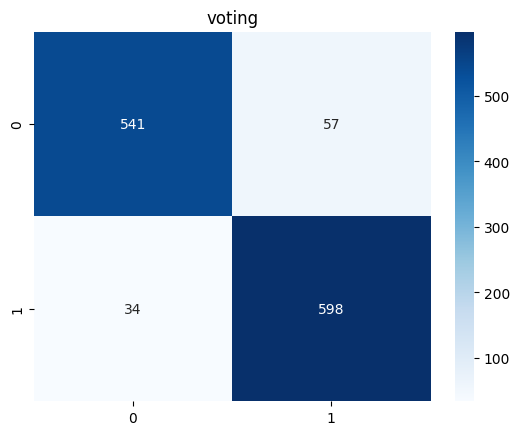

In [138]:
for k, m in confusion_matrices.items():
    plt.figure()
    plt.title(k)
    sns.heatmap(m, annot=True, fmt='d', cmap='Blues')

Text(0.5, 1.0, 'AUC')

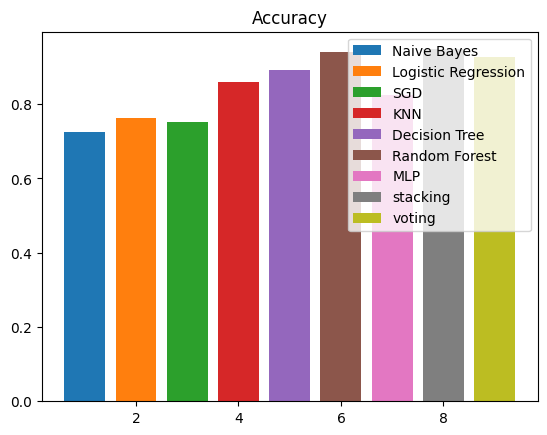

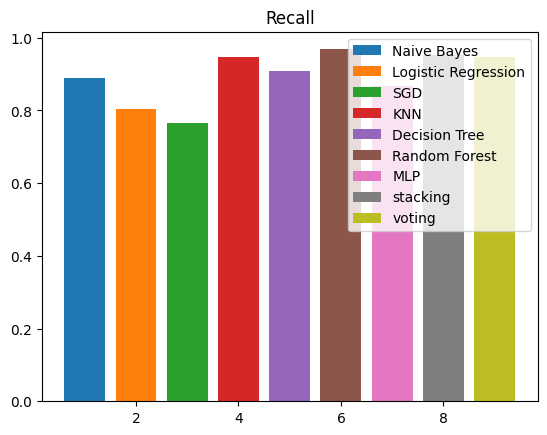

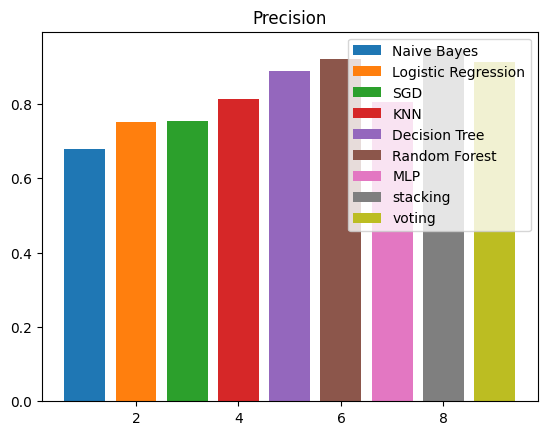

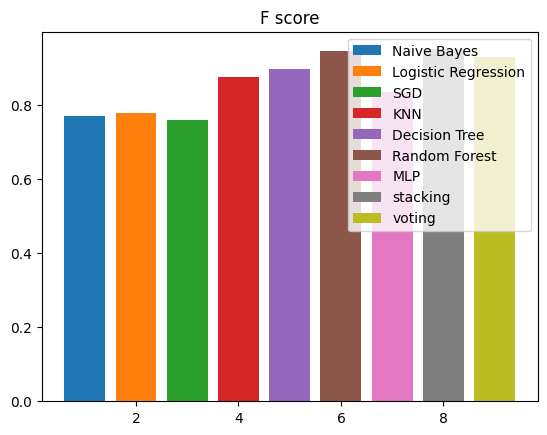

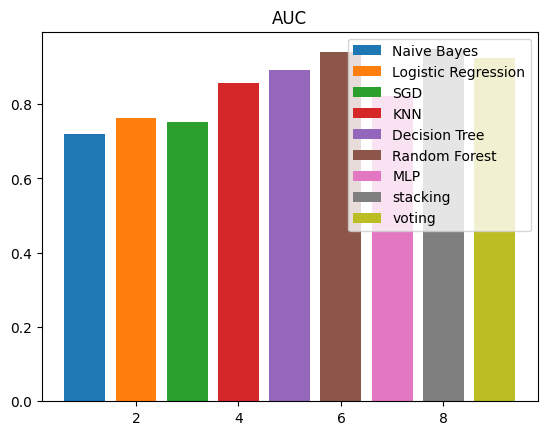

In [139]:
## Accuracy
plt.figure()
i=1
for k, v in accuracy.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Accuracy")

## Recall
plt.figure()
i=1
for k, v in recall.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Recall")

## Precision
plt.figure()
i=1
for k, v in precision.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("Precision")

## F score
plt.figure()
i=1
for k, v in F_metric.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("F score")

## AUC
plt.figure()
i=1
for k, v in auc_score.items():
    plt.bar(i, v, label = k)
    i+=1

plt.legend()
plt.title("AUC")